In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
os.getcwd()

'C:\\Users\\prani\\Downloads'

In [11]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.4.1


In [14]:
import cufflinks as cf

In [15]:
# For Notebooks
init_notebook_mode(connected=True)

In [16]:
# For offline use
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [17]:
mpg = pd.read_csv('mpg.csv')

To check for any missing value

In [18]:
mpg.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

NO MISSING VALUE

In [19]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


All Columns are with 398 values. there are some irregularities in col horsepower has datatypes as object, but in the dataset it is shown as numeric value

Converting datatype of cols horsepower

In [20]:
check = mpg.horsepower.map(lambda x:not str(x).isdigit())
mpg[check]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [21]:
mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Removing rows with no values of horse power and checking datatype of horesepower

In [22]:
mpg = mpg[~check]
mpg.horsepower = mpg.horsepower.map(int)
mpg = mpg.reset_index(drop=True)

In [23]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(3), int64(5), object(1)
memory usage: 27.6+ KB


horesepower is succefully converted to int64

# Exploratory Data Analysis
## Missing Data
Using seaborn to create a simple heatmap to see where we are missing data!

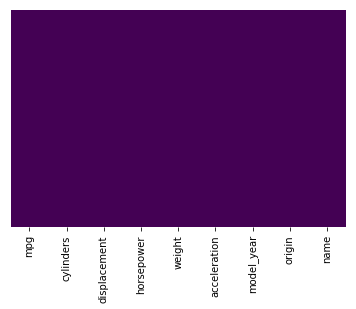

In [24]:
sns.heatmap(mpg.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No Missing Data

Checking for outliers in the dataset

In [33]:
plot1=mpg[['model_year','horsepower','displacement','acceleration']]
plot1.iplot(kind='box',title='Box Plot for model_year, horsepower,  displacement and acceleration')

In [43]:
plot2=mpg[['cylinders','mpg','origin']]
plot2.iplot(kind='box',title=' Box plot for cylinders, mpg, origin')

In [45]:
plot3=mpg['weight']
plot3.iplot(kind='box',title=' Box plot for weight')

No Outliers!

# Correlation Matrix
Plotting Correlation Matrix showing correlation coeeficients between sets of varibles and target variable.

In [39]:
correlation = mpg.corr(method='pearson', min_periods=1)
correlation

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


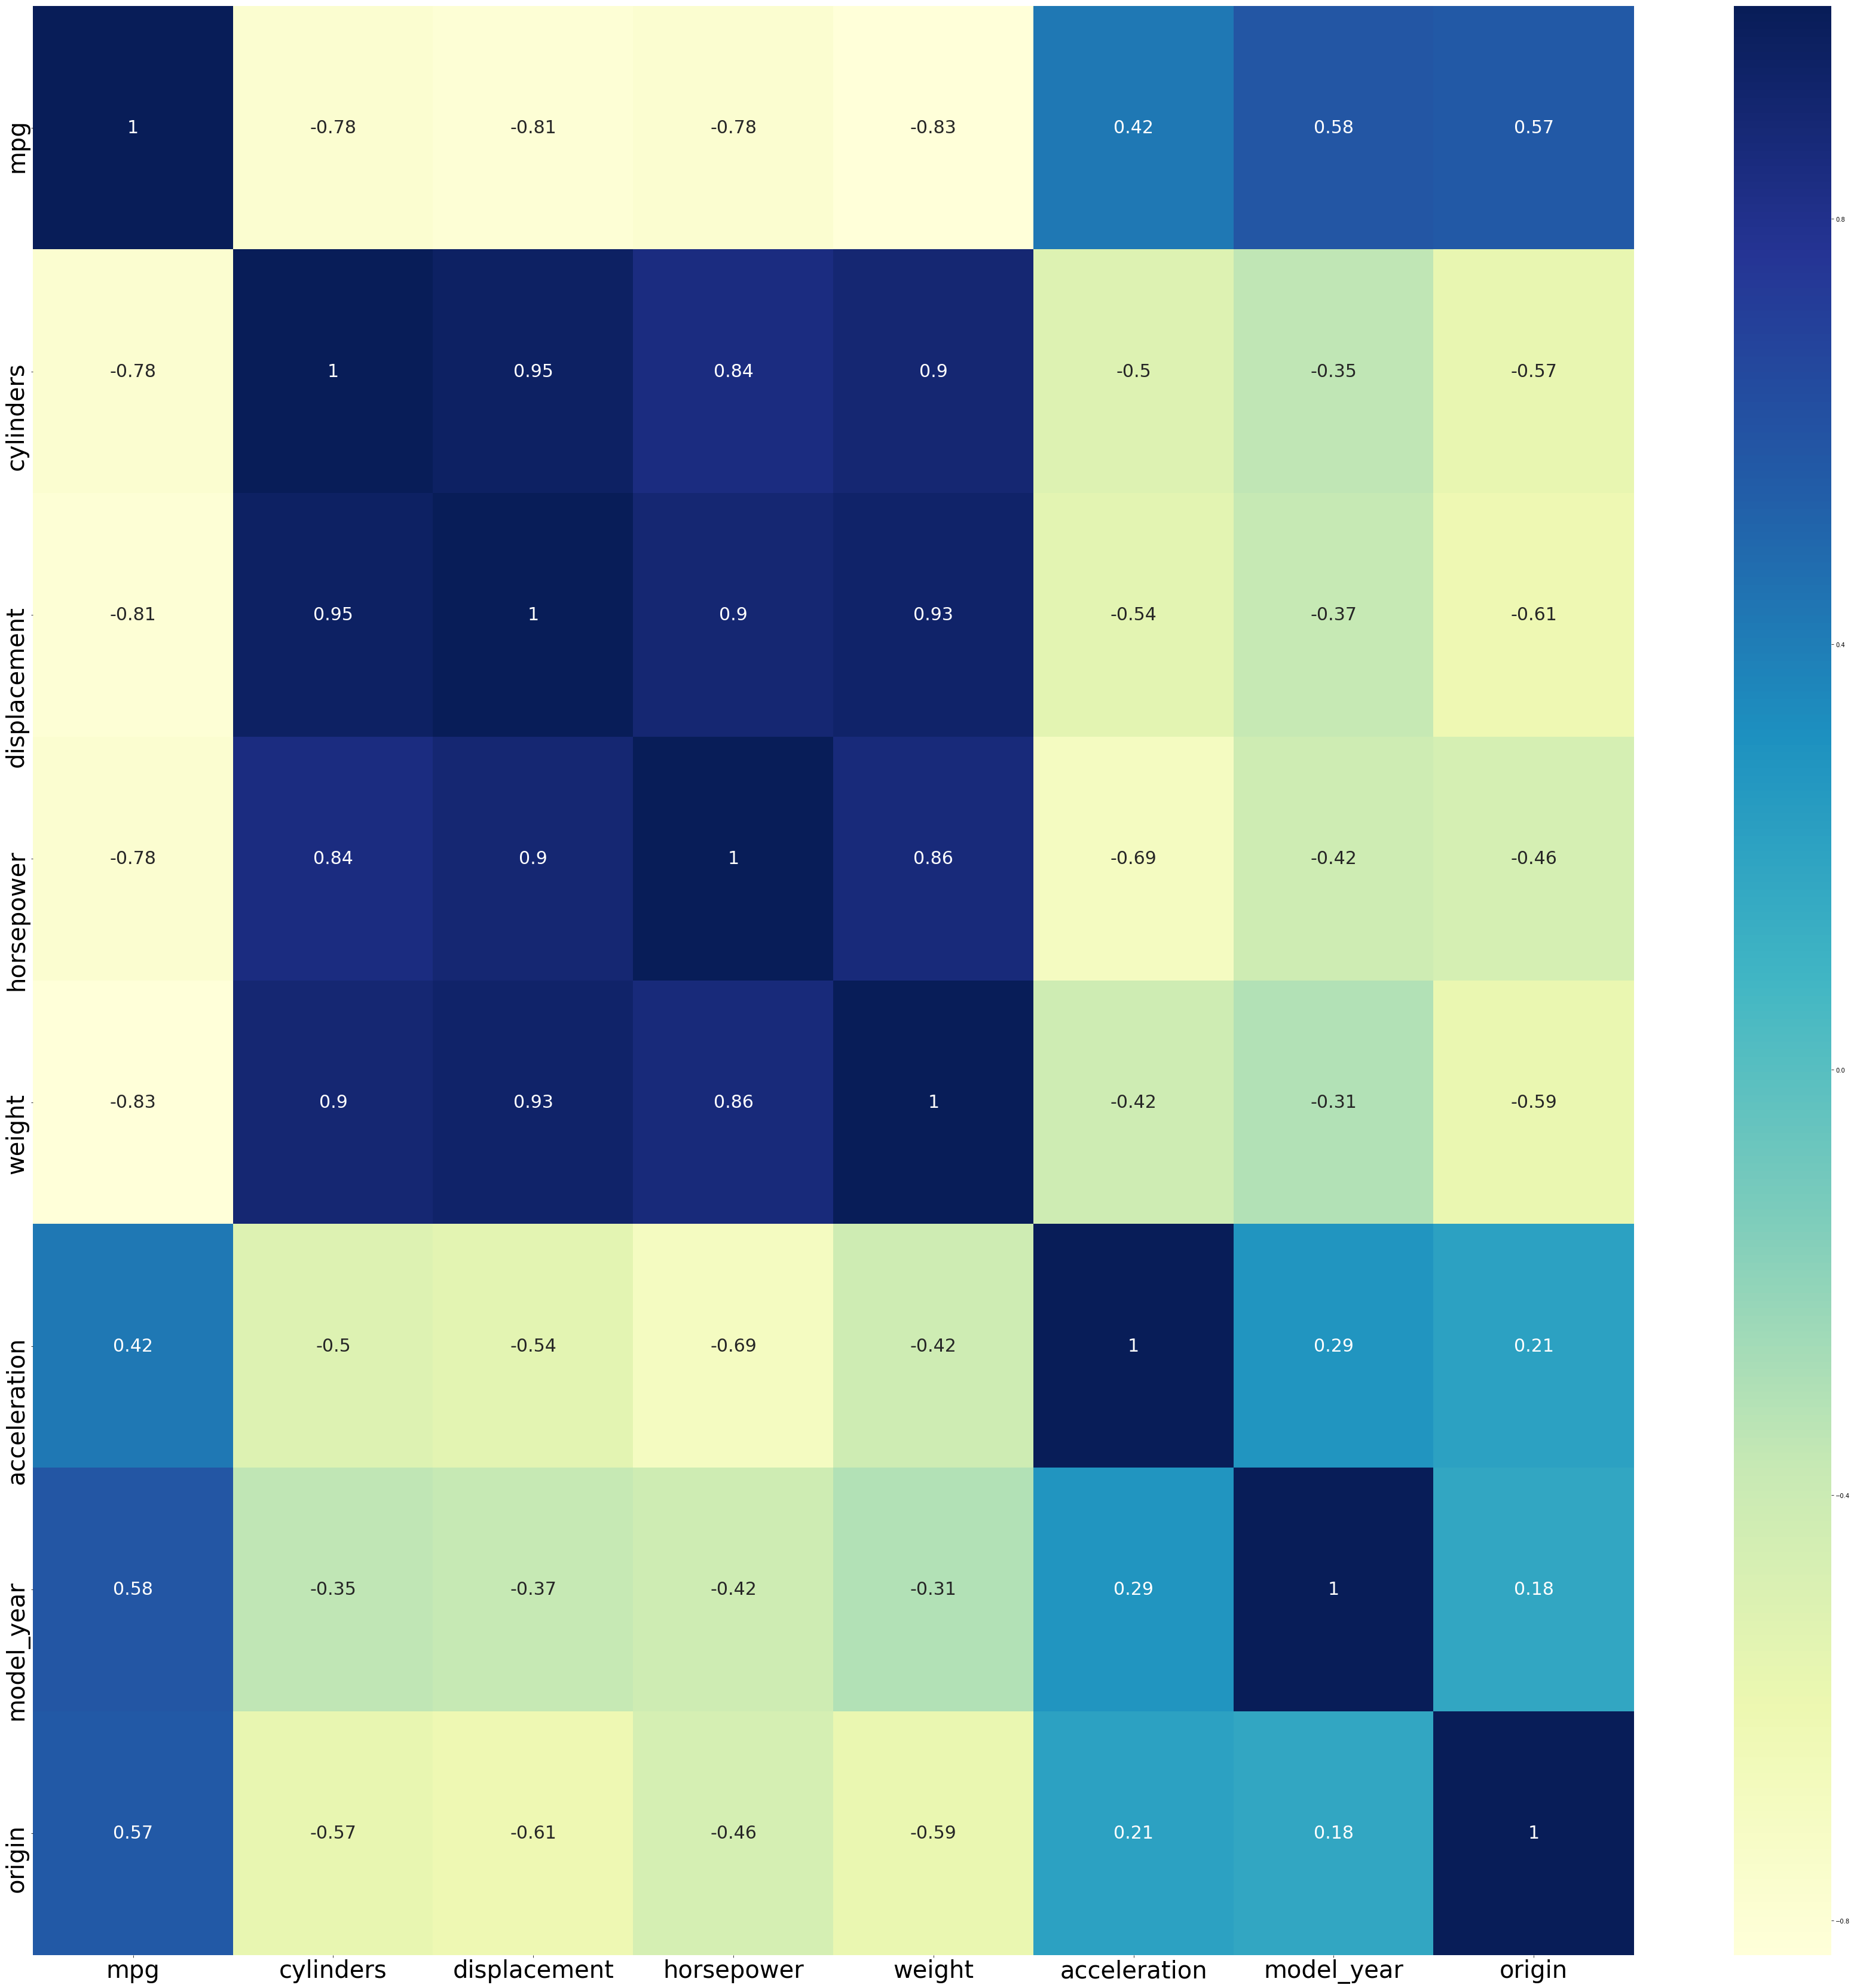

In [40]:
fig, ax = plt.subplots(figsize=(60, 60))
ax.tick_params(labelsize=40)
sns.heatmap(correlation, annot=True,annot_kws={"size": 30},cmap='YlGnBu')
plt.show()

Apart from acceleration, model_year and origin rest all variables are highly correlated to mpg.

Green - Negitive correlation; Blue - Postive correlation

Accelation of a vehicle models is an independent of other.


## Pairplot for further Analysis

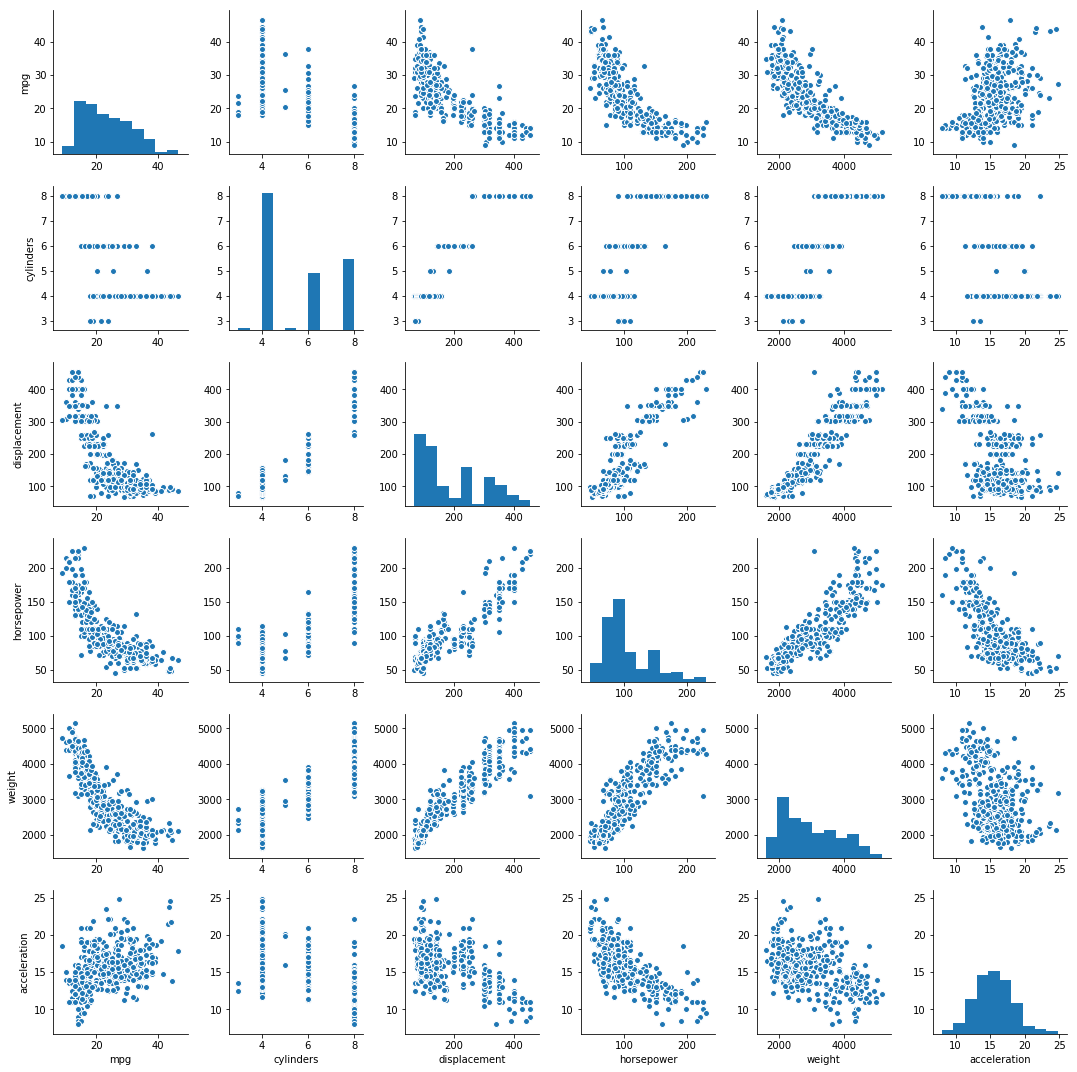

In [46]:
plot4 = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
sns.pairplot(mpg[plot4])

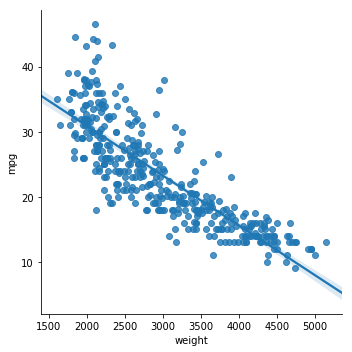

In [48]:
sns.lmplot("weight", "mpg", mpg, order=1);

Since order 1 is not covering the data throughly, we will plot using order 2

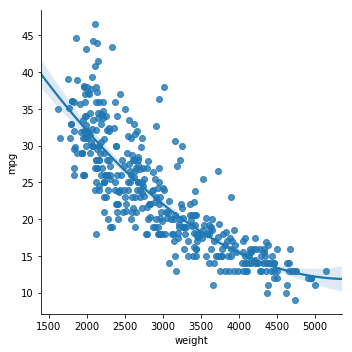

In [49]:
sns.lmplot("weight", "mpg", mpg, order=2);

In [53]:
Features = ['cylinders','displacement','horsepower','acceleration','weight','origin','model_year']
X = pd.DataFrame(mpg[Features].copy())
y = mpg['mpg'].copy()

# Variable Importance Plot

Variable importance plot provides a list of the most significant variables in descending order by a mean decrease. The top variables contribute more to the model than the bottom ones and also have high predictive power in predicting mpg.

In [52]:
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)
print(model.feature_importances_)

Sr = pd.Series(model.feature_importances_,index = X.columns)
#Sr.sort_values(inplace = True)
print(Sr)

[ 0.14590289  0.434256    0.07643529  0.0312072   0.15371468  0.01176373
  0.14672022]
cylinders       0.145903
displacement    0.434256
horsepower      0.076435
acceleration    0.031207
weight          0.153715
origin          0.011764
model_year      0.146720
dtype: float64


In [56]:
Sr.sort_values(inplace = True, ascending = False)
print(Sr)

displacement    0.434256
weight          0.153715
model_year      0.146720
cylinders       0.145903
horsepower      0.076435
acceleration    0.031207
origin          0.011764
dtype: float64


From Above, We can see that Displacement contribute more to the model in predicting mpg
# Displacement vs MPG

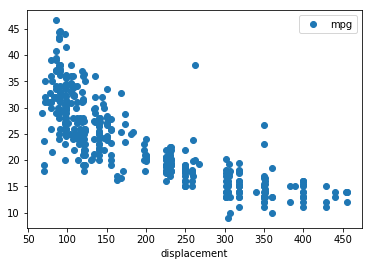

In [65]:
mpg.plot(x='displacement', y='mpg', style='o')
plt.show()

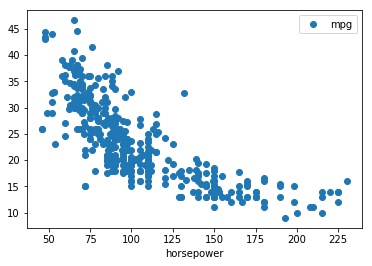

In [83]:
mpg.plot(x='horsepower', y='mpg', style='o')
plt.show()

we can see that horsepower and displacement are inversely proportion to mpg

## Training and Testing Data

In [68]:
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

C:\Users\prani\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [69]:
X = StandardScaler().fit_transform(X)

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]

True

In [71]:
regressor = LinearRegression()

In [72]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [73]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
regressor.score(X, y)

0.81809640546742091

In [75]:
y_predicted = regressor.predict(X_test)

In [76]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.486729614901561

Now applying gradient boosting to check the effect on Linear regression

In [77]:
from sklearn.ensemble import GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor(n_estimators=4000)
gb_regressor.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=4000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [78]:
gb_regressor.score(X, y)

0.96117887033390881

Gradient Boosting increases the regressor score from 0.81809 to 0.96117 which is almost 17.5% increase

In [79]:
gb_regressor.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4000,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [80]:
y_predicted_gbr = gb_regressor.predict(X_test)

In [81]:
rmse_bgr = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr))
rmse_bgr

2.667006688295705

Even the Root Mean Square Error is reduced to 2.667